In [ ]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

from sonic_screwdrivers import KerasRNN, load_rnn

Using TensorFlow backend.


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dlittle/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/dlittle/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /Users/dlittle/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/dlittle/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
%matplotlib inline

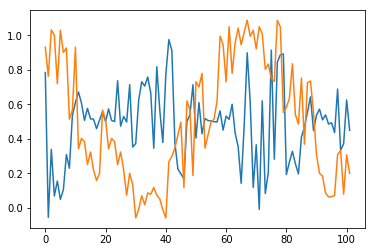

In [3]:
# generate dynamic sequence data for predictions
X=[]
Y=[]
for i in range (101):
    length = np.random.randint(120,123)
    shift = np.random.uniform(0,3*np.pi)
    stretch = np.random.normal(1,0.2)
    base_data0 = np.zeros(length)
    base_data0[:21] = 1
    base_data1 = np.sin(np.linspace(0,12,length)*stretch + shift)+np.random.normal(scale=0.1,size=(length))
    base_data2 = np.random.uniform(-1,1,size=(length))
    output1 = base_data1[:-20] * base_data2[20:]
    output2 = np.where(base_data2[10:-10]<0, base_data1[10:-10], base_data1[:-20])
    
    X += [np.stack(
        [
            base_data0[20:],
            base_data1[20:],
            base_data2[20:]
        ],
        axis=1
    )]
    
    Y += [(np.stack(
        [
            output1,
            output2
        ],
        axis=1
    ) +1)/2]

plt.plot(Y[0])

In [4]:
# initialize rnn
rnn = KerasRNN(3, 2, intra_activation='hard_sigmoid', inter_activation='tanh', loss='mean_squared_error', optimizer='rmsprop')

In [5]:
# Train rnn
rnn.fit(X[:-20],Y[:-20])

Epoch 1/10
31/31 [==============================] - 1s - loss: 0.0854
Epoch 2/10
31/31 [==============================] - 0s - loss: 0.0739
Epoch 3/10
31/31 [==============================] - 0s - loss: 0.0656
Epoch 4/10
31/31 [==============================] - 0s - loss: 0.0557
Epoch 5/10
31/31 [==============================] - 0s - loss: 0.0476
Epoch 6/10
31/31 [==============================] - 0s - loss: 0.0445
Epoch 7/10
31/31 [==============================] - 0s - loss: 0.0435
Epoch 8/10
31/31 [==============================] - 0s - loss: 0.0427
Epoch 9/10
31/31 [==============================] - 0s - loss: 0.0416
Epoch 10/10
31/31 [==============================] - 0s - loss: 0.0408
Epoch 1/10
18/18 [==============================] - 0s - loss: 0.0408
Epoch 2/10
18/18 [==============================] - 0s - loss: 0.0406
Epoch 3/10
18/18 [==============================] - 0s - loss: 0.0407
Epoch 4/10
18/18 [==============================] - 0s - loss: 0.0407
Epoch 5/10
18/18 [=

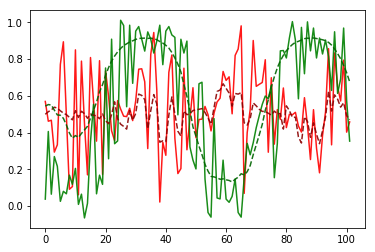

In [6]:
# Test rnn prediction
test_x = X[-20:]
test_y = Y[-20:]

plt.figure()
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'darkred','darkgreen']) +
                           cycler('linestyle', ['-', '-','--','--'])))

plt.plot(np.squeeze(test_y[0]), alpha=0.9)
plt.plot(np.squeeze(rnn.predict(test_x)[0]), alpha=0.9)

# plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g'])))

In [7]:
rnn.save('test_rnn')

In [8]:
rnn2 = load_rnn('test_rnn')

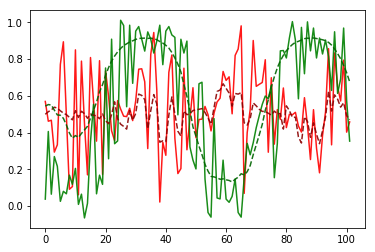

In [9]:
# Test loaded copy of rnn
test_x = X[-20:]
test_y = Y[-20:]

plt.figure()
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'darkred','darkgreen']) +
                           cycler('linestyle', ['-', '-','--','--'])))

plt.plot(np.squeeze(test_y[0]), alpha=0.9)
plt.plot(np.squeeze(rnn2.predict(test_x)[0]), alpha=0.9)

# plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g'])))